![StatModels](https://www.durhamtech.edu/themes/custom/durhamtech/images/durham-tech-logo-web.svg) 

## Applications - Statistical Modeling: Machine Learning

This lecture provides foundational knowledge and examples of machine learning modeling concepts by examining stock price data.  Here we are mostly focusing on classification models.

---

# Table of Contents

### Jupyter Overview
#### <a href='#1'>Introduction</a>
#### <a href='#2'>Data Sources</a>
#### <a href='#3'>What is Machine Learning?</a>
* Supervised Learning
* Unsupervised Learning
* Reinforcement Learning

#### <a href='#4'>Create Our Functions</a>
* Split our data into train/test
* Use Sklearn to create many different model types
        
#### <a href='#5'>Data Preprocessing</a> 
#### <a href='#6'>Logistic Regression</a>
#### <a href='#7'>k-Nearest Neighbor (kNN)</a>
#### <a href='#8'>Support Vector Machines (SVM)</a>
#### <a href='#9'>Classification and Regression Tree (CART)</a>
#### <a href='#10'>Random Forests</a>
#### <a href='#11'>Perceptron</a>
#### <a href='#12'>Neural Network</a>
#### <a href='#13'>Scaling Our Data</a>
#### <a href='#14'>Other Performance Metrics</a>
* Confusion Matrix
* Precision
* Recall

#### <a href='#55'>Weekly Readings/Videos</a>
#### <a href='#56'>Extra Practice</a>

<a id='1'></a>
## Introduction

### Our  predictive machine learning models perform two types of tasks:

* __CLASSIFICATION__:

LABELS ARE DISCRETE VALUES.

Here the model is trained to classify each instance into a set of predefined  discrete classes.
On inputting a feature vector into the model, the trained model is able to predict a  class of that instance.

Eg: We train our model using income and expenditure data of bank customers using  __defaulter or non-defaulter__ as labels. When we input income and expenditure data  of any customer in this model, it will predict whether the customer is going to default or not.

* __REGRESSION__:

LABELS ARE CONTINUOUS VALUES.

Here the model is trained to predict a continuous value for each instance.
On inputting a feature vector into the model, the trained model is able to predict a continuous value  for  that instance.

Eg: We train our model using income and expenditure data of bank customers using  __default amount__ as the label. This model when input with income and expenditure data of any customer will be able to predict the default amount the customer might end up with.


<code style="background:yellow;color:black">...We are focusing today on classification models...</code>

![FunnyML](https://www.meme-arsenal.com/memes/11f11b5d16eef661677e4c9e989dd2b3.jpg) 

<a id='2'></a>
## Data Sources

1. SP 500 Components: https://datahub.io/core/s-and-p-500-companies
2. SP 500 Company Info: https://en.wikipedia.org/wiki/List_of_S%26P_500_companies
3. TD Ameritrade Data Dicitionary https://developer.tdameritrade.com/content/streaming-data#_Toc504640567
4. Yahoo Finance: https://finance.yahoo.com/quote/%5EGSPC?p=%5EGSPC
5. Weather: https://www.weather.gov/wrh/climate?wfo=okx
6. FRED https://fred.stlouisfed.org/docs/api/fred/series.html

In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from IPython.display import Image, display
import pydotplus

warnings.filterwarnings('ignore')

//anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
# Load in more columns?
yahoo_data=pd.read_csv('Data/yahoo_data.csv', index_col=0)

# Or load in less columns that we dropped in Regression notebook?
#yahoo_data=pd.read_excel('Data/yahoo_data2.xlsx', index_col=0)

yahoo_data

,open,close,prec,temp,DFF,UNRATE,GDPC1,volume_moving,volume_moving_std,close_moving,close_moving_std,volume_slope,close_slope,close_future
252,0.000000,74.739998,2.31,31.2,3.50,5.5,3774.264,4.527619e+06,9.241526e+05,69.365952,3.210835,3.876007e+03,0.041184,83.550003
253,0.000000,74.629997,2.31,31.2,3.50,5.5,3774.264,4.535000e+06,9.215726e+05,69.414246,3.199715,3.815290e+03,0.041045,83.900002
254,0.000000,74.400002,2.31,31.2,3.50,5.5,3774.264,4.544563e+06,9.242278e+05,69.462897,3.185355,3.863518e+03,0.040868,84.290001
255,0.000000,74.279999,2.31,31.2,3.50,5.5,3774.264,4.547698e+06,9.224173e+05,69.511825,3.165982,3.763152e+03,0.040631,84.379997
256,0.000000,73.809998,2.31,31.2,3.50,5.5,3774.264,4.550079e+06,9.217721e+05,69.558254,3.149671,3.716120e+03,0.040423,84.330002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14543,3226.139893,3246.590088,3.94,68.8,0.09,7.8,18560.774,4.650244e+09,1.464733e+09,3092.189362,246.356374,6.489758e+06,0.868322,4455.479980
14544,3236.659912,3298.459961,3.94,68.8,0.09,7.8,18560.774,4.655326e+09,1.462315e+09,3093.227933,246.453794,6.358687e+06,0.872673,4443.109863
14545,3333.899902,3351.600098,3.94,68.8,0.09,7.8,18560.774,4.658163e+09,1.459933e+09,3094.501107,246.682806,6.127766e+06,0.881020,4352.629883
14546,3350.919922,3335.469971,3.94,68.8,0.09,7.8,18560.774,4.660950e+09,1.457891e+09,3096.047973,247.069186,5.926572e+06,0.892627,4359.459961


In [3]:
# Summary statistics, rounded to 2 decimals places
yahoo_data.describe().round(2)

,open,close,prec,temp,DFF,UNRATE,GDPC1,volume_moving,volume_moving_std,close_moving,close_moving_std,volume_slope,close_slope,close_future
count,14296.00,14296.00,14296.00,14296.00,14296.00,14296.00,14296.00,1.429600e+04,1.429600e+04,14296.00,14296.00,14296.00,14296.00,14296.00
mean,740.93,772.45,4.12,55.46,5.10,6.01,10575.44,1.203655e+09,2.461167e+08,745.32,41.80,349972.04,0.21,841.66
std,820.90,793.52,2.37,15.74,3.77,1.73,4614.52,1.631313e+09,3.657195e+08,761.19,45.34,2286664.93,0.61,896.09
min,0.00,62.28,0.18,22.00,0.04,3.40,3774.26,4.527619e+06,6.985104e+05,69.37,1.73,-12363322.09,-3.12,62.28
25%,0.00,105.56,2.43,40.90,1.98,4.80,6333.85,2.115281e+07,6.718421e+06,102.66,5.89,-10277.66,-0.01,108.39
50%,412.87,413.01,3.71,55.20,5.05,5.70,9643.89,1.884113e+08,4.154389e+07,394.67,20.56,27158.75,0.09,446.19
75%,1254.69,1254.80,5.26,70.60,6.93,7.20,15216.65,2.223757e+09,3.506268e+08,1229.11,72.43,377601.21,0.47,1285.61
max,3564.74,3580.84,18.95,81.40,22.36,14.80,19202.31,6.093193e+09,1.607984e+09,3097.47,247.41,14099845.55,2.02,4536.95


In [4]:
# Look into the dataset characteristics, check for feature type - categorical or numerical.
yahoo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14296 entries, 252 to 14547
Data columns (total 14 columns):
open                 14296 non-null float64
close                14296 non-null float64
prec                 14296 non-null float64
temp                 14296 non-null float64
DFF                  14296 non-null float64
UNRATE               14296 non-null float64
GDPC1                14296 non-null float64
volume_moving        14296 non-null float64
volume_moving_std    14296 non-null float64
close_moving         14296 non-null float64
close_moving_std     14296 non-null float64
volume_slope         14296 non-null float64
close_slope          14296 non-null float64
close_future         14296 non-null float64
dtypes: float64(14)
memory usage: 1.6 MB


<a id='3'></a>
## What is Machine Learning?

Machine Learning is when computers use Statistics to find patterns in data.  It's the simple process of finding a pattern and applying that pattern but there are so many diffent ways that can be used to search for that pattern.  Machine learning comes in three different flavors: supervised, unsupervised, and reinforcement.  

https://www.youtube.com/watch?v=mMc_PIemSnU&list=PLqXS1b2lRpYTpUIEu3oxfhhTuBXmMPppA&index=1

#### Supervised Learning
In supervised learning (the most common) the data is labeled to tell the machine exactly what patterns it should look for, ie: We know what we are looking for but not how to find it.
![img.png](https://d1zx6djv3kb1v7.cloudfront.net/wp-content/media/2019/09/Supervised-Machine-Learning-and-Unsupervised-Machine-Learning-1-i2tutorials.png)

#### Unsupervised Learning
In unsupervised learning, we don't know what we are looking for but we are trying to find what's similiar about the data in front of us by finding its similarities.
![img.png](https://d1zx6djv3kb1v7.cloudfront.net/wp-content/media/2019/09/Supervised-Machine-Learning-and-Unsupervised-Machine-Learning-2-i2tutorials.jpg)

source: https://www.i2tutorials.com/what-are-the-differences-between-supervised-machine-learning-and-unsupervised-machine-learning/

#### Reinforcement Learning
Lastly, in reinforcement learning the computer learns by trial and error how to achieve an objective.  If it makes moves that lead to a succesful outcome it gets rewarded while bad moves get penalized.  An example of this would be a the artifical intelligence behind a pacman ghost.
![img.png](https://miro.medium.com/max/1400/1*CjLFVeYssOIJaeijrxPHPg.png)

source: https://towardsdatascience.com/deep-q-network-combining-deep-reinforcement-learning-a5616bcfc207


Technically, you have already created a Machine Learning model using our Regression model in the previous notebook!  Our Machine Learning models have been/will all be supervised Machine Learning.
   
<a id='4'></a>
## Create Our Functions

### Split our data into train/test

In order to check the validity of our trained model, we keep a part of our dataset hidden from the model during training, called  __Test set__.

Test data labels are predicted using the trained model and compared with the actual labels of the data.This gives us the idea about how well the model can be trusted for its predictive power.

* __Training set__ : The sample of data used to fit your model.

* __Test set__ : The sample of data used to provide an unbiased evaluation of a final model fit on the training dataset. 

![image.png](Images/test_train.png)

* __Validation set__: The sample of data used to provide an unbiased evaluation of a model fit on the training dataset while tuning model hyperparameters

![image.png](Images/validation.png)

### Use Sklearn to create many different model types

* Regression
    - Logistic Regression
* Instance
    - k-Nearest Neighbor (kNN)
    - Support Vector Machines (SVM)
* Decision Trees
    - Classification and Regression Tree (CART)
    - Random Forests (also an Ensemble method)
* Neural Networks
    - Perceptron
    - Neural Network

In [5]:
def data_split(df,y_var,scale=False):
    """This function splits our data into a training and test set as well as returns the columns for use
    in other functions.  The scale variable is defaulted to false but can be changed if we need to normalize
    the data."""
    reg_df=df.copy()
    
    # train test split -> This is the usual way however not what we are using.
    #y=reg_df.pop(y_var)
    #X=reg_df
    #x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)
    
    # first 80% of the rows goes to training, the last 20% for testing.  Not randomized!
    x_train = reg_df.head(int(len(reg_df)*(0.8)))
    x_test = reg_df.iloc[max(x_train.index):]
    y_train = x_train.pop(y_var)
    y_test = x_test.pop(y_var)
    
    colz=x_train.columns
    
    # https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
    # Normalizes the features i.e. each column of X, INDIVIDUALLY, so that 
    # each column/feature/variable will have μ (the mean) = 0 and σ (the standard deviation) = 1.
    if scale: 
        scaler = StandardScaler()
        scaler.fit(x_train)
        x_train = scaler.transform(x_train)
        x_test = scaler.transform(x_test)
        
    return x_train, x_test, y_train, y_test, colz
    
def random_forest(x_train, x_test, y_train, y_test, colz, cat=False, est=10):
    # If continous y variable
    random_forest = RandomForestRegressor(n_estimators=est)
    
    # If categorical y variable
    if cat:
        random_forest = RandomForestClassifier(n_estimators=est)
    
    random_forest.fit(x_train, y_train)
    train_acc = random_forest.score(x_train, y_train)
    test_acc = random_forest.score(x_test, y_test)
    
    y_pred = random_forest.predict(x_test)
    
    print('Random Forest Results:')
    
    print('Training acuracy= ',train_acc)
    print('Test accuracy= ',test_acc)

    features = x_train.columns
    importances = random_forest.feature_importances_
    indices = np.argsort(importances)

    plt.subplots(figsize=(15, 11))
    plt.title('Feature Importances')
    plt.barh(range(len(indices)), importances[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [features[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()

def cart(x_train, x_test, y_train, y_test, colz, cat=False, maxdepth=3, minsamples=5):
    # if continuous variable
    cart = DecisionTreeRegressor(random_state=12)
    if cat:
        cart = DecisionTreeClassifier(random_state=12,max_depth=maxdepth, min_samples_split=minsamples)
    cart.fit(x_train, y_train)
    train_acc = cart.score(x_train, y_train)
    test_acc = cart.score(x_test, y_test)
    
    y_pred = cart.predict(x_test)
    
    print('CART Results:')
    
    print('CART training acuracy= ',train_acc)
    print('CART test accuracy= ',test_acc)
    
    # Creates tree graph output, used in the CART function
    def jupyter_graphviz(m, **kwargs):
        dot_data = StringIO()
        export_graphviz(m, dot_data, **kwargs)
        graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
        display(Image(graph.create_png()))
    
    jupyter_graphviz(cart, filled=True, rounded=True, special_characters=True, feature_names=colz)
    
# https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53
def perceptron(x_train, x_test, y_train, y_test, colz):
    perceptron = Perceptron(max_iter=13)
    perceptron.fit(x_train, y_train)
    perceptron_train_acc = perceptron.score(x_train, y_train)
    perceptron_test_acc = perceptron.score(x_test, y_test)
    print ('perceptron training acuracy= ',perceptron_train_acc)
    print('perceptron test accuracy= ',perceptron_test_acc)
    
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
def logreg(x_train, x_test, y_train, y_test, colz):
    logreg = LogisticRegression()
    logreg.fit(x_train, y_train)
    logreg_train_acc = logreg.score(x_train, y_train)
    logreg_test_acc = logreg.score(x_test, y_test)
    print ('Logistic Regression training acuracy= ',logreg_train_acc)
    print('Logistic Regression test accuracy= ',logreg_test_acc)
    
def svm(x_train, x_test, y_train, y_test, colz):
    print("SVM results:")
    svc = SVC()                                                  
    svc.fit(x_train, y_train)                                    
    svc_train_acc = svc.score(x_train, y_train)
    svc_test_acc = svc.score(x_test, y_test)
    print ('SVM training acuracy= ',svc_train_acc)
    print('SVM test accuracy= ',svc_test_acc)
    
def knn(x_train, x_test, y_train, y_test, colz,neighbors=3):
    knn = KNeighborsClassifier(n_neighbors = neighbors)                  
    knn.fit(x_train, y_train)                                    
    knn_train_acc = knn.score(x_train, y_train)
    knn_test_acc = knn.score(x_test, y_test)
    print ('kNN training acuracy= ',knn_train_acc)
    print('kNN test accuracy= ',knn_test_acc)
    
# Initialize model constructor
def neural_network(x_train, x_test, y_train, y_test, colz):
    inp_sh=np.array(x_train).shape[1]
    print("Neural Network results:")

    model = Sequential()
    # Add layers sequentially
    model.add(Dense(500, activation='relu', \
                        input_shape=(inp_sh,)))
    # Second
    model.add(Dense(250, activation='relu'))
    # Third
    model.add(Dense(250, activation='softmax'))
    # compile the model
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    # train the model
    NO_EPOCHS = 20
    history = model.fit(x_train, y_train,
                        batch_size=30,
                        epochs=NO_EPOCHS,
                        validation_split=0.2)

    yhat_probs = model.predict(x_test, verbose=0)
    yhat_classes = model.predict_classes(x_test, verbose=0)
    print("Test accuracy:",model.evaluate(x_test,y_test,verbose=0)[1])
    
    ## Confusion Matrix!
    ConfusionMatrix=pd.DataFrame(confusion_matrix(y_test, yhat_classes),columns=['Predicted 0','Predicted 1'],index=['Actual 0','Actual 1'])
    print ('Confusion matrix of test data is: \n', ConfusionMatrix)
    
    # Precision!
    print("Average precision for the 2 classes is", precision_score(y_test, yhat_classes, average = None) )
    
    # Recall!
    print("Average recall for the 2 classes is", recall_score(y_test, yhat_classes, average = None) )
    
    # Prints out the results for each run
    def plot_loss_acc(hist):
        f, ax = plt.subplots()
        ax.plot([None] + hist.history['acc'], 'o-')
        ax.plot([None] + hist.history['val_acc'], 'x-')
        # Plot legend and use the best location automatically: loc = 0.
        ax.legend(['Train acc', 'Validation acc'], loc = 0)
        ax.set_title('Training/Validation acc per Epoch')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Acc') 
        plt.plot()

        f, ax = plt.subplots()
        ax.plot([None] + hist.history['loss'], 'o-',c='r')
        ax.plot([None] + hist.history['val_loss'], 'x-',c='g')
        # Plot legend and use the best location automatically: loc = 0.
        ax.legend(['Train loss', 'Validation loss'], loc = 0)
        ax.set_title('Training/Validation loss per Epoch')
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Loss') 
        plt.plot()
        
    plot_loss_acc(history)

<a id='5'></a>
## Data Preprocessing

 Create a classification for whether or not if you invested today then sold a year later that you beat the average return for the S&P 500.  Success is measured as a 1, failure is measured as a 0.

https://www.investopedia.com/ask/answers/042415/what-average-annual-return-sp-500.asp

In [6]:
print("Average return in our dateset:",((yahoo_data.close_future-yahoo_data.close)/yahoo_data.close).mean())

yahoo_data['best']=np.where(((yahoo_data.close_future-yahoo_data.close)/yahoo_data.close) > .084, 1, 0)

# Create a close_moving into 3 evenly sized bins
#yahoo_data['close_moving']=pd.cut(yahoo_data['close_moving'],3,labels=[0,1,2])

# Correlation between close and open
print("Correlation between close and open:",yahoo_data['close'].corr(yahoo_data['open']))

Average return in our dateset: 0.08383693022247277
Correlation between close and open: 0.9988467937963423


In [7]:
# Delete duplicate columns (close is very similiar to open, close_future is going to be very similiar to best)
yahoo_data.drop(columns=['close','close_future'],inplace=True)
yahoo_data

,open,prec,temp,DFF,UNRATE,GDPC1,volume_moving,volume_moving_std,close_moving,close_moving_std,volume_slope,close_slope,best
252,0.000000,2.31,31.2,3.50,5.5,3774.264,4.527619e+06,9.241526e+05,69.365952,3.210835,3.876007e+03,0.041184,1
253,0.000000,2.31,31.2,3.50,5.5,3774.264,4.535000e+06,9.215726e+05,69.414246,3.199715,3.815290e+03,0.041045,1
254,0.000000,2.31,31.2,3.50,5.5,3774.264,4.544563e+06,9.242278e+05,69.462897,3.185355,3.863518e+03,0.040868,1
255,0.000000,2.31,31.2,3.50,5.5,3774.264,4.547698e+06,9.224173e+05,69.511825,3.165982,3.763152e+03,0.040631,1
256,0.000000,2.31,31.2,3.50,5.5,3774.264,4.550079e+06,9.217721e+05,69.558254,3.149671,3.716120e+03,0.040423,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14543,3226.139893,3.94,68.8,0.09,7.8,18560.774,4.650244e+09,1.464733e+09,3092.189362,246.356374,6.489758e+06,0.868322,1
14544,3236.659912,3.94,68.8,0.09,7.8,18560.774,4.655326e+09,1.462315e+09,3093.227933,246.453794,6.358687e+06,0.872673,1
14545,3333.899902,3.94,68.8,0.09,7.8,18560.774,4.658163e+09,1.459933e+09,3094.501107,246.682806,6.127766e+06,0.881020,1
14546,3350.919922,3.94,68.8,0.09,7.8,18560.774,4.660950e+09,1.457891e+09,3096.047973,247.069186,5.926572e+06,0.892627,1


In [8]:
# How many rows resulted in a good vs. bad one year later
target_count = yahoo_data['best'].value_counts()
yahoo_data['best'].value_counts()

1    7683
0    6613
Name: best, dtype: int64

In [9]:
# What is base line for prediction accuracy?
target_count[0]/(sum(target_count)) 

0.4625769445998881

In [10]:
x_train, x_test, y_train, y_test, colz = data_split(yahoo_data,'best')

<a id='6'></a>
## Logistic Regresion

![img.png](https://miro.medium.com/max/1400/1*UgYbimgPXf6XXxMy2yqRLw.png)
Source and a good read: https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

Logistic regression predicts whether something is True/False (or 1/0) using similiar techniques as linear regression.  However, note the difference in the independent (Y) variable below.  In this case it equals ln(P/(1-P)).  P indicates the probability of True, while 1-P indicates the probability of False.

The equation:
![img.png](https://i1.wp.com/taf-website-backup.s3.amazonaws.com/logit.png?resize=257%2C43)

...which can be re-written as:

![img.png](Images/logreg.png)

![img.png](https://miro.medium.com/max/725/1*Ubge8qVlc4Xk58H1oMp4Zw.jpeg)
Source: https://medium.datadriveninvestor.com/logistic-regression-18afd48779ce

Good Video Explanation: https://www.youtube.com/watch?v=yIYKR4sgzI8

In [11]:
logreg(x_train, x_test, y_train, y_test, colz)

Logistic Regression training acuracy=  0.5120671563483735
Logistic Regression test accuracy=  0.6600229973169797


<a id='7'></a>
## k-Nearest Neighbor (kNN)

https://www.youtube.com/watch?v=HVXime0nQeI

#### The KNN Algorithm

1. Choose a k value
2. For each example (E) in the training data:
    - Let Rest be all the examples in the training data that aren't E.
    - For each example (S) in REST:   
        * Calculate the distance between E and the an example from the data.
        * Add the distance and the index of the example to an ordered collection
    - Sort the ordered collection of distances and indices from smallest to largest (in ascending order) by the distances
    - Pick the first K entries from the sorted collection
    - Get the labels of the selected K entries
    - If regression, return the mean of the K labels
    - If classification, return the mode of the K label  
    
source: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

##### Distance Algorithm

![img.png](https://www.saedsayad.com/images/KNN_similarity.png)

For the example below the distance between the unknown data point and the last record (point 1):

Distance = Sqrt((48-33)^2 + (142000-150000)^2) = 8000.01 --> If we use k = 3... using the 3 closest data points, we have 2 "Y"s and 1 "N"s, implying that the new data point will be "Y" for defaulting.

![img.png](https://www.saedsayad.com/images/KNN_example_2.png)

Source: https://www.saedsayad.com/k_nearest_neighbors.htm

![img.png](https://miro.medium.com/max/500/0*zCnwFe1zL2tGN5oi.png)

Choosing different values of k can lead to different results:

![img.png](https://miro.medium.com/max/405/0*KxkMe86skK9QRcJu.jpg)

Source and a good read: https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4

Multiple dimensions:

![img.png](https://miro.medium.com/max/611/1*wW8O-0xVQUFhBGexx2B6hg.png)
Source: https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761


In [12]:
knn(x_train, x_test, y_train, y_test, colz,4)

kNN training acuracy=  0.9718433018537951
kNN test accuracy=  0.3878880797240322


<a id='8'></a>
## Support Vector Machines (SVM)

https://www.youtube.com/watch?v=_YPScrckx28

https://towardsdatascience.com/support-vector-machine-simply-explained-fee28eba5496

SVM in classification cases is a type of algorithm that tries to balance the trade-off between finding a line/plane that maximizes the distance between the different types of classification (margin) and minimizes the misclassification instances.

2-dimensional data:
![img.png](https://monkeylearn.com/static/7002b9ebbacb0e878edbf30e8ff5b01c/ae702/plot_hyperplanes_annotated.png)

Source: https://monkeylearn.com/blog/introduction-to-support-vector-machines-svm/

Multidimensional data:

![img.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png)

Source: https://scikit-learn.org/stable/modules/svm.html

In [13]:
svm(x_train, x_test, y_train, y_test, colz)

SVM results:
SVM training acuracy=  0.683455753760056
SVM test accuracy=  0.3779225756995017


<a id='9'></a>
## Classification and Regression Tree (CART)

https://www.youtube.com/watch?v=TFK01BMo1Ew

A CART model uses a decision tree flow chart in which the algorithm splits the data based on the split that produces the most similiarity on the outcome in the split groups.  

Let pi be the probability of an object being a part of a class, let C be all classes. Below is the Gini Index, finding the split that minimizes this equation is often used to create the CART model splits:

![img.png](https://miro.medium.com/max/300/0*wjT3ylLyibMv6RrD)

This results in a number between 0 and 1.  A value of 0 means equality, a value of 1 means inequality.

Source and a good read: https://medium.com/@riyapatadiya/gini-index-cart-decision-algorithm-in-machine-learning-1a4ed5d6140d

You can see an example of this logic by running the cell block below.

CART Results:
CART training acuracy=  0.8293109478838755
CART test accuracy=  0.3614411651973936


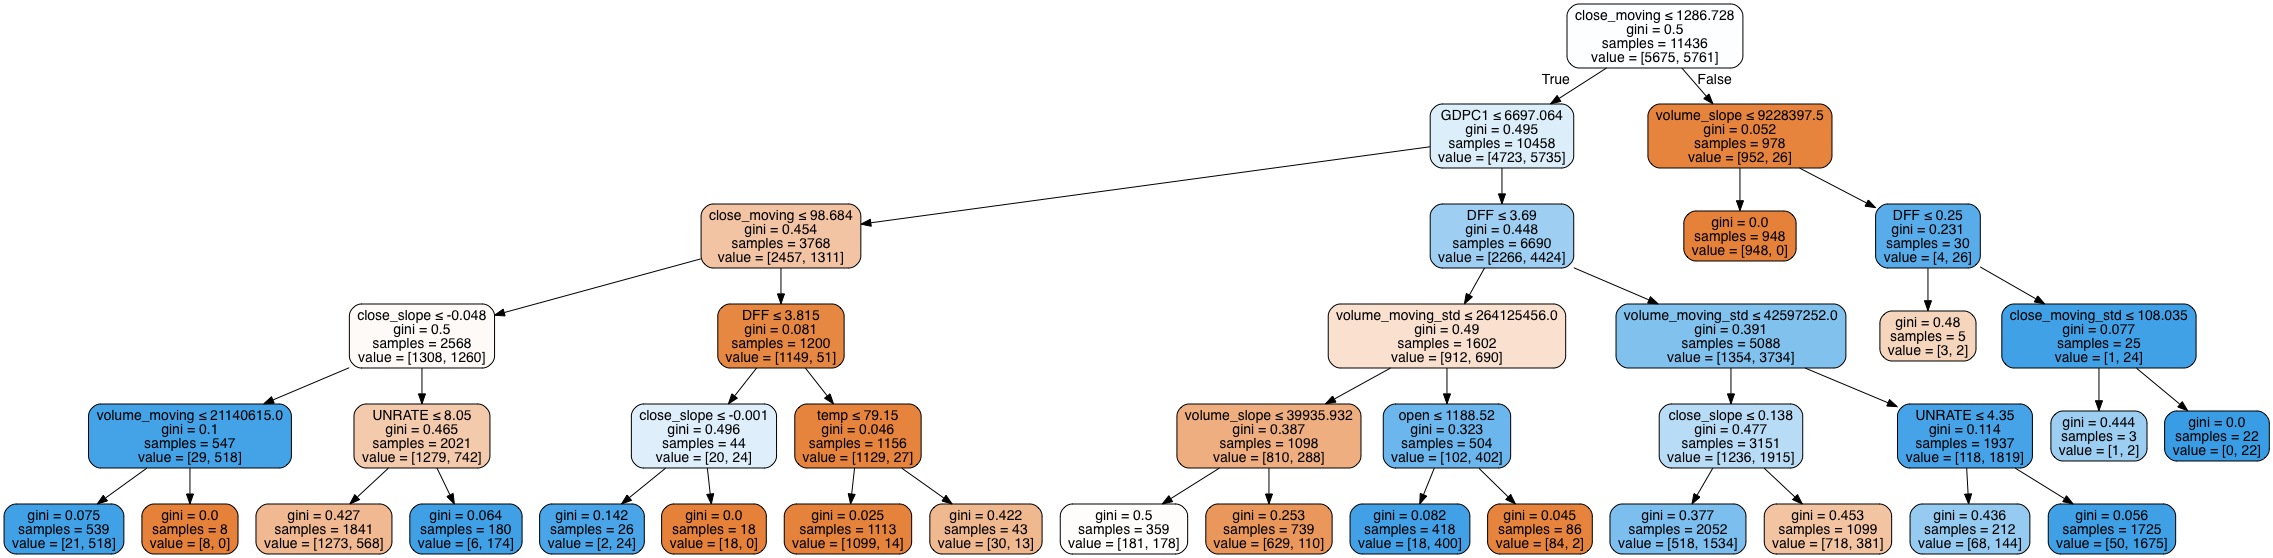

In [14]:
cart(x_train, x_test, y_train, y_test, colz, True, maxdepth=5,minsamples=10)

<a id='10'></a>
## Random Forest

https://www.youtube.com/watch?v=cIbj0WuK41w

Random Forest models are similiar to CART methods but also use bagging (take random samples of data and replacing them back for other samples to possibly use) and using random subsets of features (it doesn't use all of the predictive variables for each tree) and then averaging the results of all the trees together.

![img.png](https://miro.medium.com/max/700/1*l16JAxJR5MJea12jut-FLQ.png)

Source and a good read: https://medium.com/@harshdeepsingh_35448/understanding-random-forests-aa0ccecdbbbb

Random Forest Results:
Training acuracy=  0.9951906260930395
Test accuracy=  0.3614411651973936


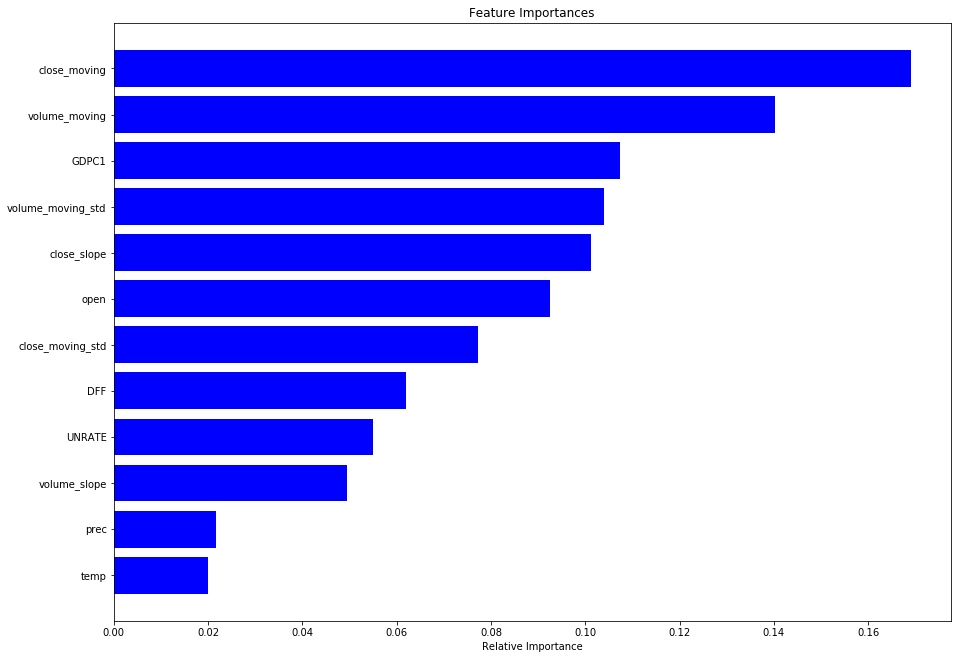

In [15]:
random_forest(x_train, x_test, y_train, y_test, colz, True, 5)

<a id='11'></a>
## Perceptron

https://www.youtube.com/watch?v=-KLnurhX-Pg

https://www.youtube.com/watch?v=EJRFP3WmS6Q

Perceptron is a binary (output can be only two options ie: 0 or 1, cat or dog) classifier and a specific type of neural network.  It works by tuning the weights associated with the input values to predict which category the inputs belong to.

![img.png](https://miro.medium.com/max/700/1*_Zy1C83cnmYUdETCeQrOgA.png)

![img.png](https://miro.medium.com/max/1002/1*ztXU57QEETPHGXczHrSWSA.gif)

Source and a good read: https://towardsdatascience.com/what-the-hell-is-perceptron-626217814f53

In [16]:
perceptron(x_train, x_test, y_train, y_test, colz)

perceptron training acuracy=  0.5037600559636236
perceptron test accuracy=  0.6569566883863549


<a id='13'></a>
## Scaling Our Data

- Use Pandas functions to remove na values or **Sklearn.preprocessing.Imputer** to impute the missing values.
- Scaling the variables using  **sklearn.preprocessing.StandardScaler**
    - The standard score of a sample x is calculated as:

        z = (x - u) / s
- Scaling using Sklearn Min Max scaler
  - X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    
    X_scaled = X_std * (max - min) + min
    
![img.png](https://i.stack.imgur.com/QEPAU.png)

In [17]:
x_train, x_test, y_train, y_test, colz = data_split(yahoo_data,'best',scale=True)

<a id='12'></a>
## Neural Network

https://www.youtube.com/watch?v=i1AqHG4k8mE

https://www.youtube.com/watch?v=jwStsp8JUPU

Just like the Perceptron, we are creating a deep layered Neural Network below.  This means that at least one layer of neurons feed into another layer of neurons, rather than the output layer.

![img.png](https://miro.medium.com/max/500/0*BSxP3AHxBe_IevHC.png)

![img.png](https://miro.medium.com/max/500/0*aWIO7eB6E4-cIkK9.gif)

Source and a good read: https://purnasaigudikandula.medium.com/a-beginner-intro-to-neural-networks-543267bda3c8

Neural Network results:
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 9148 samples, validate on 2288 samples
Epoch 1/20
9148/9148 [==============================] - 4s 485us/sample - loss: 0.7466 - acc: 0.6881 - val_loss: 1.3581 - val_acc: 0.5367
Epoch 2/20
9148/9148 [==============================] - 4s 400us/sample - loss: 0.4684 - acc: 0.7725 - val_loss: 2.0233 - val_acc: 0.5328
Epoch 3/20
9148/9148 [==============================] - 3s 358us/sample - loss: 0.3900 - acc: 0.8272 - val_loss: 2.5153 - val_acc: 0.5712
Epoch 4/20
9148/9148 [==============================] - 5s 509us/sample - loss: 0.3556 - acc: 0.8513 - val_loss: 2.4463 - val_acc: 0.5883
Epoch 5/20
9148/9148 [==============================] - 3s 357us/sample - loss: 0.3182 - acc: 0.8684 - val_loss: 3.6039 - val_acc: 0.5804
Epoch 6/20
9148/9148 [==============================] - 4s 393us/sample - loss: 0.3023 - acc: 0.8747 - val_loss: 3.8239 

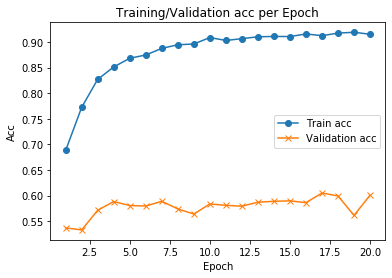

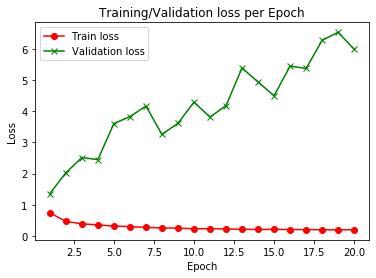

In [18]:
# Test model prediction accuracy using validation data 
# this gives you bias and variance error in the model.
neural_network(x_train, x_test, y_train, y_test, colz)

<a id='14'></a>
## Other Performance Metrics

#### Accuracy can be misleading!

Other measures of performance - Confusion matrix, Precision, Recall

### Confusion matrix 

A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.

![image.png](Images/confusion.png)

### Precision 

Precision (P) is defined as the number of true positives (T_p) over the number of true positives plus the number of false positives (F_p)

![image.png](Images/precision.png)

### Recall 

Recall (R) is defined as the number of true positives (T_p) over the number of true positives plus the number of false negatives (F_n)

![image.png](Images/recall.png)

<a id='55'></a>
# Weekly Readings/Videos

https://siebelm.github.io/Harry_Potter_1/

https://www.theverge.com/2017/12/12/16768582/harry-potter-ai-fanfiction

<a id='56'></a>
# Extra Practice